### **TEXT ANALYTICS PROJECT**

## Problem Statement
A leading mobile phone has launched a new phone to the market. Here we are helping the mobile brand to understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about by performing topic modeling on specific parts of speech.

## Data
Customer reviews data from Amazon

## Analysis to be done
POS tagging, topic Modelling using LDA and interpreting the topics

## About the dataset

#### Source : KAGGLE 
#### Dataset: 'K8 Reviews v0.2.csv'
#### Columns: Sentiment,Review

## Objective

Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. 

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk import FreqDist
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
#pip install wordcloud

In [ ]:
from wordcloud import WordCloud 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving K8 Reviews v0.2.csv to K8 Reviews v0.2.csv


### Reading the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Text_Analytics/K8 Reviews v0.2.csv')
df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [ ]:
## Checking the overall sentiment of all the reviews

In [ ]:
df['sentiment'].value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

### WordCloud

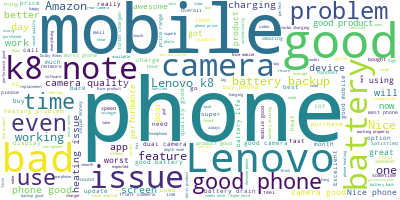

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(df['review'] .values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### **Preprocessing the data**

#### Converting everything into lower

In [ ]:
reviews = list(df['review'].values)
reviews = [review.lower() for review in reviews]
print("Reviews in lower case:")
print (reviews[0])

Reviews in lower case:
good but need updates and improvements


### Tokenizing the reviews

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
review_tokens = [nltk.word_tokenize(i) for i in reviews]
print ("Preview of the first review")
review_tokens[0]

Preview of the first review


['good', 'but', 'need', 'updates', 'and', 'improvements']

### Part of speech tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
pos_tagged = [nltk.pos_tag(review) for review in review_tokens]
print ("Words with tag") 
pos_tagged[0]

Words with tag


[('good', 'JJ'),
 ('but', 'CC'),
 ('need', 'VBP'),
 ('updates', 'NNS'),
 ('and', 'CC'),
 ('improvements', 'NNS')]

### We only take nouns for topic model

In [ ]:
reviews_noun = []
for review in pos_tagged:
    reviews_noun.append([postag for postag in review if postag[1].startswith('NN')])

In [ ]:
# taking only nouns
reviews_noun[0]

[('updates', 'NNS'), ('improvements', 'NNS')]

### Lemmatization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lem = nltk.WordNetLemmatizer()
lem_reviews =[]
for  review in reviews_noun:
    lem_reviews.append([lem.lemmatize(postag[0]) for postag in review])

In [ ]:
lem_reviews[0]

['update', 'improvement']

### Removing stopword if any

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from string import punctuation
clean_reviews = []
for review in lem_reviews:
    clean_reviews.append([word for word in review if word not in (stopwords.words('english') + list(punctuation))])

### Create a topic model using LDA on the cleaned-up data

In [ ]:
#pip install gensim

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(clean_reviews)
print ("Preview of the corpora dictionary")
print (id2word)

Preview of the corpora dictionary
Dictionary(10139 unique tokens: ['improvement', 'update', 'amazon', 'backup', 'battery']...)


In [ ]:
# Create Corpus
texts = clean_reviews
clean_reviews[11]

['phone', 'charger', 'damage', 'month']

In [ ]:
clean_reviews[1]

['mobile',
 'battery',
 'hell',
 'backup',
 'hour',
 'us',
 'idle',
 'discharged.this',
 'lie',
 'amazon',
 'lenove',
 'battery',
 'charger',
 'hour']

In [ ]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print ("Preview of the document frequency")
print (corpus[1])

Preview of the document frequency
[(2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [ ]:
print(corpus[2])

[(14, 1), (15, 1)]


## **Modelling**

### **LDA**
LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.
Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.
When I say topic, what is it actually and how it is represented?
A topic is nothing but a collection of dominant keywords that are typical representatives. Just by looking at the keywords, you can identify what the topic is all about.

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6, 
                                       random_state=22,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
topics = lda_model.show_topics(formatted=False)

In [ ]:
topics

[(0,
  [('battery', 0.11079236),
   ('phone', 0.09547533),
   ('problem', 0.06348433),
   ('issue', 0.04620099),
   ('heating', 0.024359467),
   ('camera', 0.023360666),
   ('time', 0.023260027),
   ('network', 0.022912862),
   ('performance', 0.021916073),
   ('day', 0.021756476)]),
 (1,
  [('camera', 0.13191603),
   ('quality', 0.06862494),
   ('mobile', 0.06073618),
   ('battery', 0.016994162),
   ('speaker', 0.015759092),
   ('feature', 0.014831479),
   ('performance', 0.014808953),
   ('sound', 0.014673347),
   ('price', 0.01454822),
   ('mode', 0.014490854)]),
 (2,
  [('note', 0.05016249),
   ('charger', 0.04558717),
   ('k8', 0.036652733),
   ('hai', 0.023200346),
   ('h', 0.01853036),
   ('mobile', 0.014843365),
   ('lenovo', 0.011953287),
   ('ho', 0.010148526),
   ('battery', 0.00975266),
   ('condition', 0.009326613)]),
 (3,
  [('phone', 0.20041831),
   ('feature', 0.032113183),
   ('screen', 0.029326092),
   ('note', 0.02549223),
   ('call', 0.020899883),
   ('option', 0.01

In [ ]:
0.09446416 + 0.059518974+0.053178284+0.043486353+ 0.043251663+ 0.025694003+ 0.01674236+ 0.014820264+ 0.014253314+0.012682653

0.3780920280000001

### Visualizing LDA

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=7469a87b2ad5539e66e6dcef8876fae2e93ee1affcb252ea2aac96c91ebbe21a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.190097 -0.047774       1        1  24.849494
1     -0.034105 -0.275062       2        1  20.233225
5     -0.108968  0.197707       3        1  19.581987
3     -0.108755  0.062166       4        1  17.139001
2      0.182128  0.083895       5        1   9.281431
4      0.259796 -0.020931       6        1   8.914862, topic_info=         Term         Freq        Total Category  logprob  loglift
17      phone  6264.000000  6264.000000  Default  30.0000  30.0000
52    product  1997.000000  1997.000000  Default  29.0000  29.0000
60     camera  2829.000000  2829.000000  Default  28.0000  28.0000
4     battery  2774.000000  2774.000000  Default  27.0000  27.0000
104   quality  1209.000000  1209.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
398  software    57.654482   297.553590   Topic6  -4.9022   0.7763
414       lte    25.826897    37.288050   Topic6  -5.7053   2.0502
717    review    33.185017   167.830292   Topic6  -5.4546   0.7966
499       box    31.604033   128.142283   Topic6  -5.5034   1.0176
36      month    31.216549   449.108598   Topic6  -5.5157  -0.2489

[340 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
45        2  0.293488         ..
45        3  0.323700         ..
45        4  0.267592         ..
45        5  0.116532         ..
2559      5  0.941716       ..it
...     ...       ...        ...
493       6  0.989418      worth
358       3  0.979733         ye
29        3  0.986547       year
1300      6  0.975412  yesterday
2476      1  0.971758       zoom

[468 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 6, 4, 3, 5])

### **Identifying the number of topics**

In [ ]:
import warnings

In [ ]:
#help(warnings)

In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
  maxv = 0
  maxnt = 0
  for nt in range(2,15):
      lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=nt, 
                                               random_state=10,
                                               passes=10,
                                               per_word_topics=True)
      coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_reviews, dictionary=id2word, coherence='c_v')
      coherence_lda = coherence_model_lda.get_coherence()
      print ('Coherence Score:{} No of topics {} '.format(coherence_lda, nt))
      if coherence_lda > maxv:
          maxv = coherence_lda
          maxnt = nt

Coherence Score:0.5576666067223379 No of topics 2 
Coherence Score:0.5359796074845172 No of topics 3 
Coherence Score:0.5891746691833799 No of topics 4 
Coherence Score:0.6015852200196715 No of topics 5 
Coherence Score:0.6084053819953116 No of topics 6 
Coherence Score:0.5730166818343596 No of topics 7 
Coherence Score:0.582320336700372 No of topics 8 
Coherence Score:0.5630008379916224 No of topics 9 
Coherence Score:0.5105654775270944 No of topics 10 
Coherence Score:0.5503078402216407 No of topics 11 
Coherence Score:0.5391101181728113 No of topics 12 
Coherence Score:0.5311722708185711 No of topics 13 
Coherence Score:0.5196791107425602 No of topics 14 


**Number of topics**.\
The number of topics with Maximum coherence score is 6

### Interpreting the topics

Topic 0 is a represented as 0.11 "battery" + 0.09 "phone" + 0.051 "backup" + 0.050"camera" + 0.038"day" + 0.037"hour" + 0.033"issue" + 0.030"life" + '
  '0.024*"performance" + 0.024*"time.
It means the top 10 keywords that contribute to this topic are: ‘car’, ‘power’, ‘light’.. and so on and the weight of ‘car’ on topic 0 is 0.016.The weights reflect how important a keyword is to that topic

### **Topics Choosen**
#### Topic 1 -'Mobile issues', 
#### Topic 2 -'Battery Performance', 
#### Topic 3 -'Features and Details' , 
#### Topic 4 -'Phone Performance', 
#### Topic 5 -'Amazon Services' , 
#### Topic 6 -'Value For Money'

### **Conclusion**
POS Tagging , topic modelling using LDA and topic interpretation has been successfully completed and solved the business problem of understanding the customer concerns.